In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfr = pd.read_csv (r'./crightEMG.txt', sep = '\t')
dfr

,Time,EMG,Muscle Force
0,0.000,0.000000,0.222950
1,0.001,0.000000,0.222950
2,0.002,0.000000,0.222569
3,0.003,0.000000,0.222569
4,0.004,0.000000,0.222569
...,...,...,...
119483,119.483,-1.308980,0.217617
119484,119.484,-1.664270,0.217617
119485,119.485,-0.082288,0.217617
119486,119.486,0.754082,0.217617


In [4]:
dfl = pd.read_csv (r'./crightEMG_2.txt', sep = '\t')
dfl

,Time,EMG,Muscle Force
0,0.000,0.000000,0.223332
1,0.001,0.000000,0.223332
2,0.002,0.000000,0.222950
3,0.003,0.000000,0.222950
4,0.004,0.000000,0.222950
...,...,...,...
91131,91.131,0.304321,0.217617
91132,91.132,-0.169723,0.217617
91133,91.133,-0.433423,0.217617
91134,91.134,-0.381894,0.217617


Text(0, 0.5, 'EMG (Volts)')

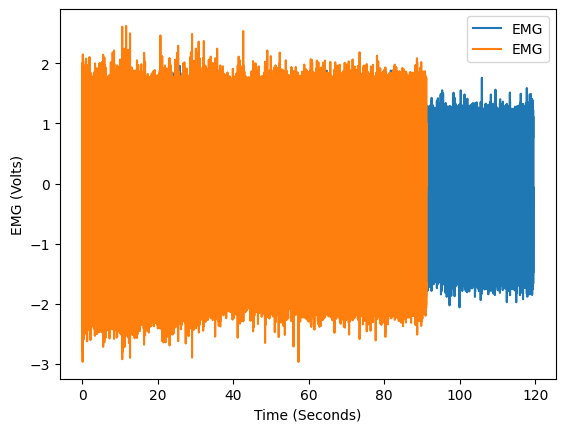

In [5]:
fig, ax = plt.subplots()
dfr.plot.line(ax = ax, y = 'EMG', x = 'Time')
dfl.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [14]:
# Define the parameters
window_size = 10  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10 # Step size in seconds (how often you want to chec

In [28]:
# Initialize lists to store the calculated max values
max_values_r = []
time_intervals_r = []

max_values_l = []
time_intervals_l = []

# Iterate through the data in steps for dfr
for i in range(0, len(dfr), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfr):
        window_data = dfr.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_r.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_r.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfr
result_df_r = pd.DataFrame({'Time': time_intervals_r, 'MaxEMG_R': max_values_r})

# Iterate through the data in steps for dfl
for i in range(0, len(dfl), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfl):
        window_data = dfl.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_l.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_l.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfl
result_df_l = pd.DataFrame({'Time': time_intervals_l, 'MaxEMG_L': max_values_l})

# Calculate the percentage of max EMG for each 0.5 seconds interval for both dfr and dfl
result_df_r['MaxEMG_percent_1st'] = (result_df_r['MaxEMG_R'] / result_df_r['MaxEMG_R'].max()) * 100
result_df_l['MaxEMG_percent_2nd'] = (result_df_l['MaxEMG_L'] / result_df_l['MaxEMG_L'].max()) * 100

# Display the results
print(result_df_r)
print(result_df_l)

        Time  MaxEMG_R  MaxEMG_percent_1st
0     4.9995   1.83845           93.832939
1    14.9995   1.95778           99.923441
2    24.9995   1.95876           99.973460
3    34.9995   1.95928          100.000000
4    44.9995   1.73434           88.519252
5    54.9995   1.79051           91.386121
6    64.9995   1.87961           95.933710
7    74.9995   1.75293           89.468070
8    84.9995   1.88289           96.101119
9    94.9995   1.55237           79.231657
10  104.9995   1.76194           89.927933
      Time  MaxEMG_L  MaxEMG_percent_2nd
0   4.9995   2.21449           84.393674
1  14.9995   2.62400          100.000000
2  24.9995   2.49005           94.895198
3  34.9995   2.37327           90.444741
4  44.9995   2.53839           96.737424
5  54.9995   2.18023           83.088034
6  64.9995   2.07039           78.902058
7  74.9995   2.18505           83.271723
8  84.9995   2.08503           79.459985


In [29]:
threshold = 80

In [33]:
reached_threshold_R = result_df_r[result_df_r['MaxEMG_percent_1st'] <= threshold]
time_at_threshold_1st = reached_threshold_R['Time'].iloc[0]
reached_threshold_L = result_df_l[result_df_l['MaxEMG_percent_2nd'] <= threshold]
time_at_threshold_2nd = reached_threshold_L['Time'].iloc[0]
print(f"Time at ~{threshold} % of max for first time: {time_at_threshold_1st} seconds")
print(f"Time at ~{threshold} % of max for second time: {time_at_threshold_2nd} seconds")

Time at ~80 % of max for first time: 94.9995 seconds
Time at ~80 % of max for second time: 64.9995 seconds


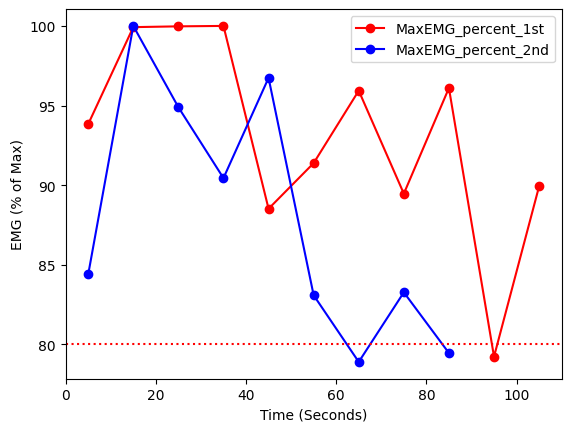

In [34]:

fig, ax = plt.subplots()
result_df_r.plot.line(ax = ax, y = 'MaxEMG_percent_1st', x = 'Time', color = 'r', marker = 'o')
result_df_l.plot.line(ax = ax, y = 'MaxEMG_percent_2nd', x = 'Time', color = 'b', marker = 'o')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

Text(0.5, 1.0, 'Fatigability Assay - First Try vs Second Try')

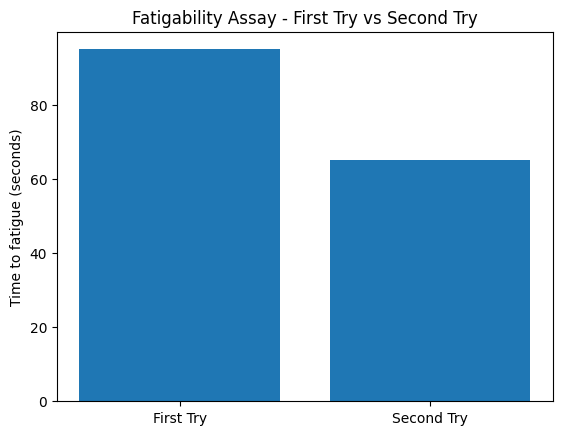

In [37]:
# build a bar plot
plt.bar(['First Try', 'Second Try'],[time_at_threshold_1st, time_at_threshold_2nd])
plt.ylabel('Time to fatigue (seconds)')
plt.title('Fatigability Assay - First Try vs Second Try')